In [2]:
%run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'


from datetime import *
import sys

def my_plot(x, y, figx, figy, fontsize, labels, labelx, labely, title, filename):
    cycol = cycle('bgrcmk')
    fig = plt.figure(figsize=(figx,figy))
    axes = fig.add_subplot(1, 1, 1)
    axes.scatter(x, y, c = next(cycol), linestyle = '-.', s=200)
    axes.plot(x,y, c=next(cycol), linestyle = '-.')
    axes.tick_params(axis='both',labelsize=fontsize)
    axes.legend(fontsize =fontsize)
    axes.set_xlabel(str(labelx), fontsize=fontsize+10)
    axes.set_ylabel(str(labely), fontsize=fontsize+10)
    axes.tick_params(axis='both',labelsize=fontsize+5)
    axes.legend(loc = 'upper right', fontsize=fontsize)
    fig.suptitle(title, fontsize=fontsize+15)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for l, xpt, ypt in zip(labels, x,y):
        axes.text(xpt,ypt,str(l), fontsize=fontsize+2)
    fig.savefig(curr_ls_out+ '/'+str(filename) + "-" + datetime.now().strftime("%Y-%m-%d-%H-%M-%S")+'.jpg', dp1=1600)


'''

curr_ls = Popen(['pwd'], stdout=PIPE, stderr=PIPE)
curr_ls_out = curr_ls.communicate()[0].decode('utf-8').rstrip()

def my_plot(x, y, figx, figy, fontsize, labels, labelx, labely, title, filename):
    cycol = cycle('bgrcmk')
    fig = plt.figure(figsize=(figx,figy))
    axes = fig.add_subplot(1, 1, 1)
    axes.scatter(x, y, c = next(cycol), linestyle = '-.', s=200)
    axes.plot(x,y, c=next(cycol), linestyle = '-.')
    axes.tick_params(axis='both',labelsize=fontsize)
    axes.legend(fontsize =fontsize)
    axes.set_xlabel(str(labelx), fontsize=fontsize+10)
    axes.set_ylabel(str(labely), fontsize=fontsize+10)
    axes.tick_params(axis='both',labelsize=fontsize+5)
    axes.legend(loc = 'upper right', fontsize=fontsize)
    fig.suptitle(title, fontsize=fontsize+15)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for l, xpt, ypt in zip(labels, x,y):
        axes.text(xpt,ypt,str(l), fontsize=fontsize+5)
    fig.savefig(curr_ls_out+ '/'+str(filename) + "-" + datetime.now().strftime("%Y-%m-%d-%H-%M-%S")+'.jpg', dp1=1600)

"""
my_plot(xposl1, l1_prop, 20, 20, 20, 'x', 'beam size', 'beam propagation l1', 'test1')
my_plot(xposl2, l2_prop, 20, 20, 20, 'x', 'beam size', 'beam propagation l2', 'test1')
"""

def filename_generator(path):
    process = Popen(["ls"], cwd=path, stdout=PIPE, stderr=PIPE)
    #to return the values 
    arr = []
    process_stdout = process.communicate()[0].decode('utf-8').splitlines()
    for l in process_stdout:
        if '.csv' in str(l):
            arr.append(l.replace('.csv',''))
    return (arr)
def data_pathfiles_generator(curr_path, cp):
    #to return the values 
    arr = []
    #dir_path= Popen(["ls", "-l"], stdout=PIPE, stderr=PIPE)
    process=  Popen(["ls"], cwd=cp, stdout=PIPE, stderr=PIPE)
    process_stdout = process.communicate()[0]
    files_arr = process_stdout.decode('utf-8').splitlines()
    file_extractor_pos = Popen(["pwd"],stdout=PIPE, stderr=PIPE)
    file_extractor_pos_stdout= file_extractor_pos.communicate()[0].decode('utf-8').rstrip()
    
    for file in files_arr:
        if '.csv' in file:
            arr.append(file_extractor_pos_stdout+'/'+file)  
    return(arr)

fnames = filename_generator(curr_ls_out)
fnames.reverse()
print(fnames)
print(*range(0, len(fnames)))
fpaths = data_pathfiles_generator(curr_ls_out)
fpaths.reverse()


mpath = []
lpath = []
for i in range(len(fpaths)):
    if i >= 1 and i <=6: 
        mpath.append(fpaths[i])
    if i > 6 and i < len(fpaths)-1:
        lpath.append(fpaths[i])

        
mdata = data_generator(mpath)
ldata = data_generator(lpath)
alldata = data_generator(fpaths)


waist_m = np.multiply(2, fit_parameter_extractor(gaussian, mdata)[2])
waist_l = np.multiply(2, fit_parameter_extractor(gaussian, ldata)[2])
allwaist = np.multiply(2, fit_parameter_extractor(gaussian, alldata)[2])

for i in lpath:
    print(i)
print(waist_l)
twaist = [allwaist[6], allwaist[11], # m1, l1, l2
          allwaist[10], 
          
          allwaist[5], allwaist[9], # m2, l3, m3
         allwaist[4], 
          
          allwaist[3], allwaist[8], #m4,l4, m5
         allwaist[2], 
          
          allwaist[1], allwaist[7], #m6, l5, end
         allwaist[12]] #the end

pos = [0, 812, 1009, 
       2095, 2195, 5176.7, 
       11297.16, 13691.16, 14072.86,
       26462.86, 26844.56, 29471.56]
print(twaist)
labels = ['$M_1$', '$L_1$', '$L_2$', '$M_2$', '$L_3$', '$M_3$', 
         '$M_4$', '$L_4$', '$M_5$', '$M_6$', '$L_5$', 'Comp.']



#my_plot(pos, twaist, 60, 30, 45, labels, 'Beam Position (mm)', 'Beam Size(mm)', 'Beam Size Evolution Along Transport', 'sashafile')

'''

'\n\ncurr_ls = Popen([\'pwd\'], stdout=PIPE, stderr=PIPE)\ncurr_ls_out = curr_ls.communicate()[0].decode(\'utf-8\').rstrip()\n\ndef my_plot(x, y, figx, figy, fontsize, labels, labelx, labely, title, filename):\n    cycol = cycle(\'bgrcmk\')\n    fig = plt.figure(figsize=(figx,figy))\n    axes = fig.add_subplot(1, 1, 1)\n    axes.scatter(x, y, c = next(cycol), linestyle = \'-.\', s=200)\n    axes.plot(x,y, c=next(cycol), linestyle = \'-.\')\n    axes.tick_params(axis=\'both\',labelsize=fontsize)\n    axes.legend(fontsize =fontsize)\n    axes.set_xlabel(str(labelx), fontsize=fontsize+10)\n    axes.set_ylabel(str(labely), fontsize=fontsize+10)\n    axes.tick_params(axis=\'both\',labelsize=fontsize+5)\n    axes.legend(loc = \'upper right\', fontsize=fontsize)\n    fig.suptitle(title, fontsize=fontsize+15)\n    fig.tight_layout()\n    fig.subplots_adjust(top=0.95)\n    for l, xpt, ypt in zip(labels, x,y):\n        axes.text(xpt,ypt,str(l), fontsize=fontsize+5)\n    fig.savefig(curr_ls_out+ 

544
1061
1578
2095
11400.0
11802.46
12204.92
12607.38
13009.84
13412.3


/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0 5.00049053101
1 5.00049053101
2 4.9832304576
3 0.431841232469
4 4.12046050418
5 8.67223655313
6 13.2240301902
7 13.2240322434
8 13.2371690492
9 13.6216640665
10 14.0061666773
11 14.3906739218
12 14.7751890893
13 14.7751890106
14 15.3861316241
15 15.9970864429
16 16.6080537523
17 17.2190311554
18 17.8300169079
19 17.8300174668
20 18.0308858866
21 18.2317520218
22 18.4326176105
23 18.6334874074
24 18.8343588054
25 18.8300657007
26 18.8300657909
27 12.8390648707
28 6.84813176768
29 0.859932893253
30 5.13487484728
31 11.1254058317
32 11.125405822
33 11.1302798025
34 11.5240951301
35 11.9176454731
36 12.311107542
37 12.704955899
38 13.098392299
39 13.0983925309
38


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


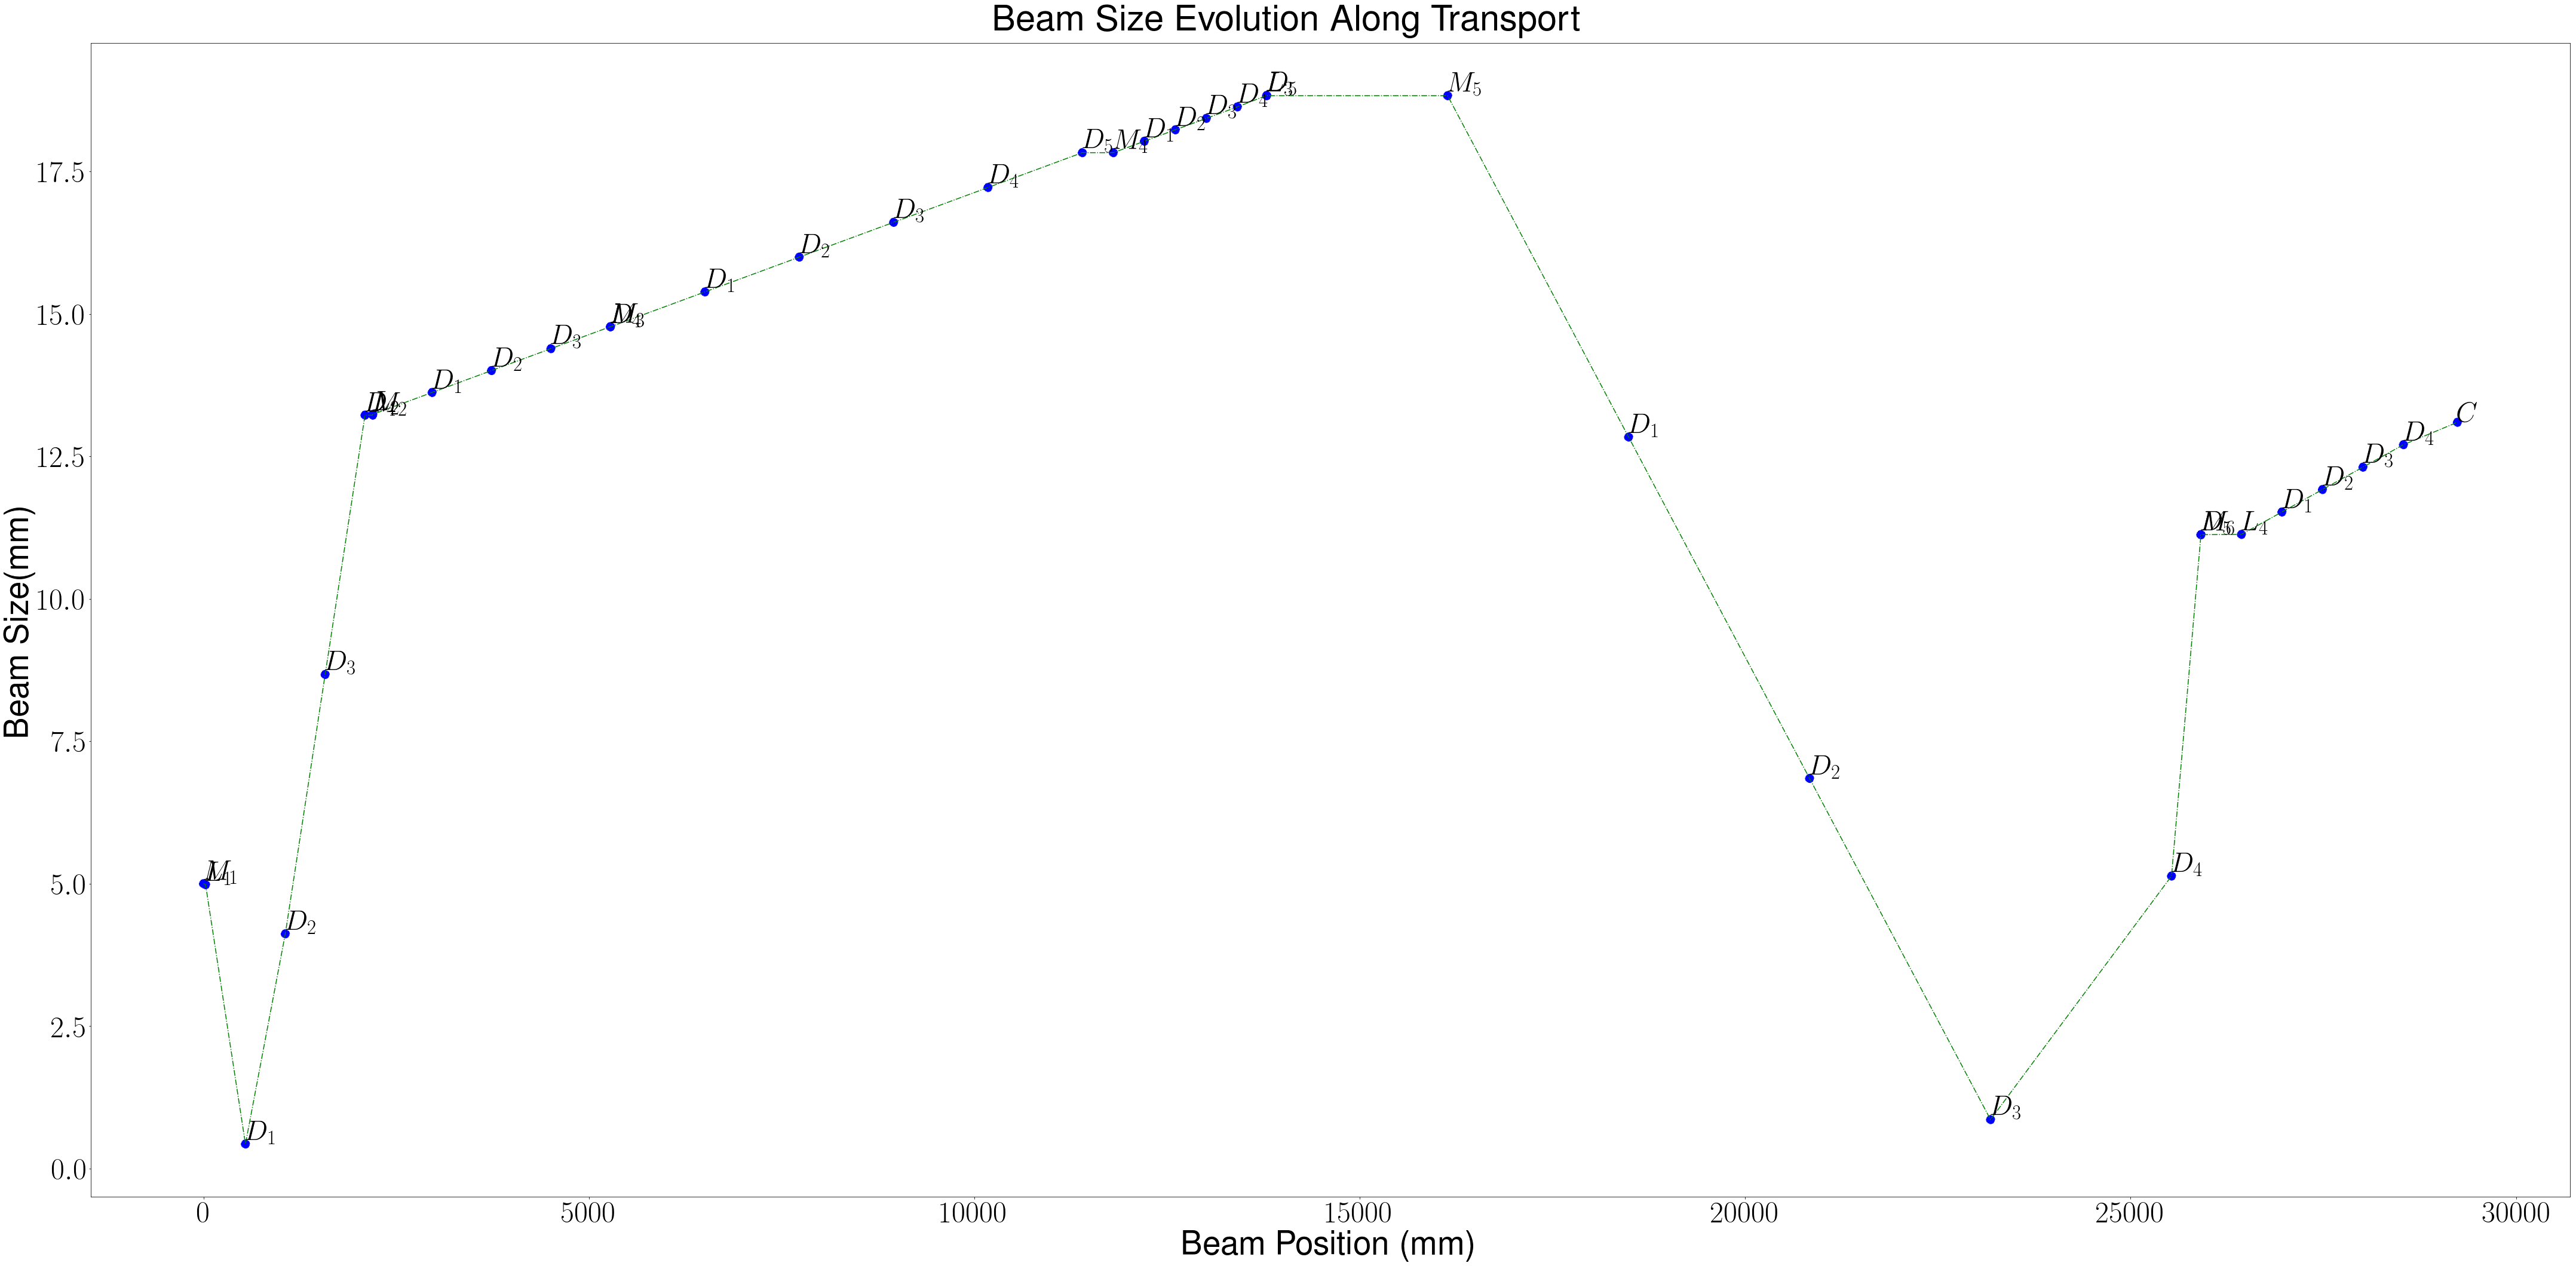

In [3]:
p = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/FACET_model_current/new_build_transport'

curr_ls = Popen(['pwd'], cwd=p ,stdout=PIPE, stderr=PIPE)
curr_ls_out = curr_ls.communicate()[0].decode('utf-8').rstrip()
def data_pathfiles_generator(curr_path, cp):
    #to return the values 
    arr = []
    #dir_path= Popen(["ls", "-l"], stdout=PIPE, stderr=PIPE)
    process=  Popen(["ls"], cwd=cp, stdout=PIPE, stderr=PIPE)
    process_stdout = process.communicate()[0]
    files_arr = process_stdout.decode('utf-8').splitlines()
    file_extractor_pos = Popen(["pwd"], cwd=cp,stdout=PIPE, stderr=PIPE)
    file_extractor_pos_stdout= file_extractor_pos.communicate()[0].decode('utf-8').rstrip()
    
    for file in files_arr:
        if '.csv' in file:
            arr.append(file_extractor_pos_stdout+'/'+file)  
    return(arr)
r_paths = data_pathfiles_generator(curr_ls_out, p)

dpaths = []


l1_m2 = []
lr_gallery = []
inside_gallery = []
m4_l3 = []
m5_m6 =[]
l4_comp =[]
for i in r_paths:
    if '/0.csv' in i:
        dpaths.append(i)
    elif '/1.' in i:
        dpaths.append(i)
    elif '/2.' in i:
        l1_m2.append(i)
        dpaths.append(i)
    elif '/3.' in i:
        dpaths.append(i)
    elif '/4.' in i:
        lr_gallery.append(i)
        dpaths.append(i)
    elif '/5.' in i:
        inside_gallery.append(i)
        dpaths.append(i)
    elif '/6.' in i:
        m4_l3.append(i)
        dpaths.append(i)
    elif '/7.' in i:
        dpaths.append(i)
    elif '/8.' in i:
        m5_m6.append(i)
        dpaths.append(i)
    elif '/9.' in i:
        dpaths.append(i)
    elif '/10.' in i:
        l4_comp.append(i)
        dpaths.append(i)
    elif '/11.' in i:
        dpaths.append(i)

l1_m2.insert(0,l1_m2.pop())
lr_gallery.insert(0, lr_gallery.pop())
inside_gallery.insert(0, inside_gallery.pop())
m4_l3.insert(0,m4_l3.pop())
m5_m6.insert(0, m5_m6.pop())
l4_comp.insert(0, l4_comp.pop())

pos_l1m2 = []
pos_lrgal = []
pos_igal = []
pos_m4l3 = []
pos_m5m6 = []
pos_l4comp = []

for i in range(544,2100,517):
    pos_l1m2.append(i)
t = np.arange(2965.5, 5280, 770.5) #between lens 2 and m3 
for i in t:
    pos_lrgal.append(i)

t = np.arange(11800.46,13411,402.46)
for i in t:
    pos_igal.append(i)


transport_paths = []
transport_pos = [0, 27] 
transport_index = []
labels = ['$M_1$', '$L_1$', 
          '$D_1$','$D_2$','$D_3$','$D_4$', 
         '$M_2$', '$L_2$', 
         '$D_1$','$D_2$','$D_3$','$D_4$',
         '$M_3$', 
         '$D_1$','$D_2$','$D_3$','$D_4$','$D_5$',
         '$M_4$', 
         '$D_1$','$D_2$','$D_3$','$D_4$','$D_5$',
         '$L_3$', '$M_5$',
         '$D_1$','$D_2$','$D_3$','$D_4$','$D_5$', 
         '$M_6$', '$L_4$', 
         '$D_1$','$D_2$','$D_3$','$D_4$', 
         '$C$']
for i in range(544, 2100, 517): #between lens 1 and m2 
    print(i)
    transport_pos.append(i)



transport_pos.append(2195) #lens 2 pos 

t = np.arange(2195, 5280, 770.5) #between lens 2 and m3 

for i in t:
    transport_pos.append(i)

t = np.arange(5280,11400,1224.2) #between le
for i in t:
    transport_pos.append(i)

t = np.arange(11400,13792,402.46)
for i in t:
    print(i)
    transport_pos.append(i)

transport_pos.append(13792)    

t = np.arange(13792,25600,2347.66)
for i in t:
    transport_pos.append(i)

transport_pos.append(25912)  
t = np.arange(25912,28540,525.4)
for i in t:
    transport_pos.append(i)

transport_pos.append(29239)
    
for i in range(len(transport_pos)):
    transport_index.append(i)
for i in r_paths:
    if '/0.csv' in i:
        transport_paths.append(i) #start
    elif '/1.' in i:
        transport_paths.append(i) #mirror 1
for i in l1_m2:
    transport_paths.append(i) # drifts between l1 and mirror 2 
for i in r_paths:
    if '/3.csv' in i:
        transport_paths.append(i)       
for i in lr_gallery:
    transport_paths.append(i)
for i in inside_gallery:
    transport_paths.append(i)
for i in m4_l3:
    transport_paths.append(i)
for i in r_paths:
    if '/7.csv' in i:
        transport_paths.append(i)
for i in m5_m6:
    transport_paths.append(i)
for i in r_paths:
    if '/9.csv' in i:
        transport_paths.append(i)
for i in l4_comp:
    transport_paths.append(i)
for i in r_paths:
    if '/11.csv' in i:
        transport_paths.append(i)        


rdata = data_generator(transport_paths)

t_arr_waist = np.multiply(2, fit_parameter_extractor(gaussian, rdata)[2])
windx =[]
for i in range(len(t_arr_waist)):
    windx.append(i)

for i in range(len(t_arr_waist)):
    print(windx[i], t_arr_waist[i])

w = t_arr_waist[1:len(t_arr_waist)-1]
print(len(labels))
my_plot(transport_pos, w, 60, 30, 45, labels, 'Beam Position (mm)', 'Beam Size(mm)', 'Beam Size Evolution Along Transport', 'sashafile')


